In [ ]:
from tool import *
from tool import *
def splice(files,output_file,pixel_size=0.0003,band_num=1,type='int32',masked=None):
    # print(files[0])
    MinX, MaxY, MaxX, MinY = get_extent(files[0])

    for fn in files[1:]:
        minX, maxY, maxX, minY = get_extent(fn)
        MinX = min(MinX, minX)
        MaxY = max(MaxY, maxY)
        MaxX = max(MaxX, maxX)
        MinY = min(MinY, minY)


    ds = gdal.Open(files[0])
    transform = ds.GetGeoTransform()
    pixelWidth = transform[1]
    pixelHeight = transform[5]
    #获取输出图像的行与列
    cols = int((MaxX - MinX) / pixel_size)
    rows = int((MaxY - MinY) / pixel_size)
    # print(cols)
    NP2GDAL_CONVERSION = {
      "uint8": 1,
      "int8": 1,
      "uint16": 2,
      "int16": 3,
      "uint32": 4,
      "int32": 5,
      "float32": 6,
      "float64": 7,
      "complex64": 10,
      "complex128": 11,
    }
    driver = gdal.GetDriverByName('GTiff')
    dsOut = driver.Create(output_file,
                            cols,rows,1,5,
                            ['COMPRESS=LZW','BIGTIFF=YES'])
    bandOut = dsOut.GetRasterBand(1)

    # 设置输出图像的几何信息和投影信息
    geotransform = [MinX, pixel_size, 0, MaxY, 0, pixel_size*(-1)]
    dsOut.SetGeoTransform(geotransform)
    dsOut.SetProjection(ds.GetProjection())
    # label=np.ones([rows,cols],dtype=type)*(-1001)
    label=np.zeros([rows,cols],dtype=type)
    n=0
    for fn in tqdm(files, desc=f'Band {band_num} '):
        ds = gdal.Open(fn)
        transform = ds.GetGeoTransform()
        pixelWidth = transform[1]
        pixelHeight = transform[5]

        rows = ds.RasterYSize
        cols = ds.RasterXSize
        transform = ds.GetGeoTransform()
        minX = transform[0]
        maxY = transform[3]
        pixelWidth = transform[1]
        pixelHeight = transform[5]#是负值（important）

        maxX = minX + (cols * pixelWidth)
        minY = maxY + (rows * pixelHeight)

        xOffset = round((minX - MinX) / pixel_size)
        yOffset = round((maxY - MaxY) / (pixel_size*(-1)))
        cols=int(cols*pixelWidth/pixel_size)
        rows=int(rows*pixelHeight/(pixel_size*(-1)))
        band = ds.GetRasterBand(band_num)
        # data = band.ReadAsArray(buf_xsize=cols,buf_ysize = rows)
        data = band.ReadAsArray()
        # data[np.isnan(data)]=-1001
        if masked is not None:
            data[data>=masked]=np.nan
        # print(data.max())
        label_part=label[yOffset:yOffset+rows,xOffset:xOffset+cols]
        # label_part2=label_part+data
        # label_part2[(label_part>0)&(data>0)]=np.maximum(data[(label_part>0)&(data>0)],label_part[(label_part>0)&(data2>0)])
        # label[yOffset:yOffset+rows,xOffset:xOffset+cols]=np.maximum(data,label_part)
        label[yOffset:yOffset+rows,xOffset:xOffset+cols]=data
        n+=1
        # print('\n拼接图像'+str(n))
    # print(label.max())
    # label[label==(-1001)]=np.nan
    # plt.imshow(label,vmin=-0.05,vmax=0.05,cmap='seismic')
    # plt.colorbar()
    # plt.show()
    label[np.isnan(label)]=0
    label[label>=1000]=1000
    label[label<=-1000]=-1000
    label*=100
    label=label.astype('int32')
    dsOut.GetRasterBand(1).WriteArray(label)
    dsOut.FlushCache()
    del dsOut

In [2]:
for t in ['W','B']:
    for b in ['NDVI','SSI','NMDI']:
        for m in range(1,13):
            try:
                print(t,b,m)
                fs=glob(f'/ssd_hzy/G2/{t}_{b}{m}-*')

                splice(fs,f'/ssd_hzy/G3/{t}_{b}{m}.tif',pixel_size=0.004491576420597608,band_num=1,type='float32')
            except:
                print(t,b,m)
                fs=glob(f'/ssd_hzy/G2/{t}_{b}{m}-*')

                splice(fs,f'/ssd_hzy/G3/{t}_{b}{m}.tif',pixel_size=0.004491576420597608,band_num=1,type='float32')


# for b in ['SM','NDVI_ln','SZA_cos']:
#     for t in ['W','B']:
#         fs=glob(f'/ssd_hzy/G/{b}/{t}_{b}-*.tif')
#         splice(fs,f'/ssd_hzy/G/{b}/{t}_{b}.tif',pixel_size=0.004491576420597608,band_num=1,type='float32')


W NDVI 1


Band 1 : 100%|██████████| 8/8 [02:12<00:00, 16.53s/it]


W NDVI 2


Band 1 : 100%|██████████| 8/8 [02:09<00:00, 16.21s/it]


W NDVI 3


Band 1 : 100%|██████████| 8/8 [02:08<00:00, 16.09s/it]


W NDVI 4


Band 1 :   0%|          | 0/8 [00:00<?, ?it/s]

W NDVI 5


Band 1 : 100%|██████████| 8/8 [02:15<00:00, 16.92s/it]


W NDVI 6


Band 1 : 100%|██████████| 8/8 [02:20<00:00, 17.59s/it]


W NDVI 7


Band 1 : 100%|██████████| 8/8 [02:31<00:00, 18.93s/it]


W NDVI 8


Band 1 : 100%|██████████| 8/8 [02:34<00:00, 19.37s/it]


W NDVI 9


Band 1 : 100%|██████████| 8/8 [02:31<00:00, 18.96s/it]


W NDVI 10


Band 1 : 100%|██████████| 8/8 [02:09<00:00, 16.16s/it]


W NDVI 11


Band 1 : 100%|██████████| 8/8 [01:50<00:00, 13.84s/it]


W NDVI 12


Band 1 :   0%|          | 0/6 [00:00<?, ?it/s]

W SSI 1


Band 1 :   0%|          | 0/6 [00:00<?, ?it/s]

W SSI 2


Band 1 :   0%|          | 0/6 [00:00<?, ?it/s]

W SSI 3


Band 1 :   0%|          | 0/6 [00:00<?, ?it/s]

W SSI 4


Band 1 :   0%|          | 0/6 [00:00<?, ?it/s]

W SSI 5


Band 1 : 100%|██████████| 6/6 [01:06<00:00, 11.12s/it]


W SSI 6


Band 1 : 100%|██████████| 6/6 [01:09<00:00, 11.62s/it]


W SSI 7


Band 1 : 100%|██████████| 6/6 [01:15<00:00, 12.61s/it]


W SSI 8


Band 1 : 100%|██████████| 6/6 [01:18<00:00, 13.02s/it]


W SSI 9


Band 1 : 100%|██████████| 6/6 [01:16<00:00, 12.69s/it]


W SSI 10


Band 1 : 100%|██████████| 6/6 [01:05<00:00, 10.84s/it]


W SSI 11


Band 1 :   0%|          | 0/6 [00:00<?, ?it/s]

W SSI 12


Band 1 : 100%|██████████| 6/6 [00:43<00:00,  7.17s/it]


W NMDI 1


Band 1 :   0%|          | 0/6 [00:00<?, ?it/s]

W NMDI 2


Band 1 :   0%|          | 0/6 [00:00<?, ?it/s]

W NMDI 3


Band 1 :   0%|          | 0/6 [00:00<?, ?it/s]

W NMDI 4


Band 1 :   0%|          | 0/6 [00:00<?, ?it/s]

W NMDI 5


Band 1 : 100%|██████████| 6/6 [01:06<00:00, 11.02s/it]


W NMDI 6


Band 1 : 100%|██████████| 6/6 [01:08<00:00, 11.48s/it]


W NMDI 7


Band 1 : 100%|██████████| 6/6 [01:14<00:00, 12.46s/it]


W NMDI 8


Band 1 : 100%|██████████| 6/6 [01:16<00:00, 12.78s/it]


W NMDI 9


Band 1 : 100%|██████████| 6/6 [01:13<00:00, 12.32s/it]


W NMDI 10


Band 1 :   0%|          | 0/6 [00:00<?, ?it/s]

W NMDI 11


Band 1 : 100%|██████████| 6/6 [00:55<00:00,  9.24s/it]


W NMDI 12


Band 1 : 100%|██████████| 6/6 [01:04<00:00, 10.78s/it]


B NDVI 1


Band 1 : 100%|██████████| 8/8 [01:39<00:00, 12.40s/it]


B NDVI 2


Band 1 : 100%|██████████| 8/8 [01:41<00:00, 12.69s/it]


B NDVI 3


Band 1 : 100%|██████████| 8/8 [01:49<00:00, 13.67s/it]


B NDVI 4


Band 1 : 100%|██████████| 8/8 [01:59<00:00, 15.00s/it]


B NDVI 5


Band 1 : 100%|██████████| 8/8 [02:15<00:00, 16.90s/it]


B NDVI 6


Band 1 : 100%|██████████| 8/8 [02:36<00:00, 19.58s/it]


B NDVI 7


Band 1 : 100%|██████████| 8/8 [02:31<00:00, 18.88s/it]


B NDVI 8


Band 1 : 100%|██████████| 8/8 [02:35<00:00, 19.46s/it]


B NDVI 9


Band 1 : 100%|██████████| 8/8 [02:31<00:00, 18.99s/it]


B NDVI 10


Band 1 : 100%|██████████| 8/8 [02:10<00:00, 16.31s/it]


B NDVI 11


Band 1 : 100%|██████████| 8/8 [01:52<00:00, 14.09s/it]


B NDVI 12


Band 1 :   0%|          | 0/6 [00:00<?, ?it/s]

B SSI 1


Band 1 :   0%|          | 0/6 [00:00<?, ?it/s]

B SSI 2


Band 1 :   0%|          | 0/6 [00:00<?, ?it/s]

B SSI 3


Band 1 :   0%|          | 0/6 [00:00<?, ?it/s]

B SSI 4


Band 1 :   0%|          | 0/6 [00:00<?, ?it/s]

B SSI 5


Band 1 : 100%|██████████| 6/6 [01:06<00:00, 11.01s/it]


B SSI 6


Band 1 : 100%|██████████| 6/6 [01:09<00:00, 11.63s/it]


B SSI 7


Band 1 : 100%|██████████| 6/6 [01:14<00:00, 12.47s/it]


B SSI 8


Band 1 : 100%|██████████| 6/6 [01:17<00:00, 12.91s/it]


B SSI 9


Band 1 : 100%|██████████| 6/6 [01:15<00:00, 12.62s/it]


B SSI 10


Band 1 : 100%|██████████| 6/6 [01:05<00:00, 10.85s/it]


B SSI 11


Band 1 :   0%|          | 0/6 [00:00<?, ?it/s]

B SSI 12


Band 1 :   0%|          | 0/6 [00:00<?, ?it/s]

B NMDI 1


Band 1 :   0%|          | 0/6 [00:00<?, ?it/s]

B NMDI 2


Band 1 :   0%|          | 0/6 [00:00<?, ?it/s]

B NMDI 3


Band 1 :   0%|          | 0/6 [00:00<?, ?it/s]

B NMDI 4


Band 1 :   0%|          | 0/6 [00:00<?, ?it/s]

B NMDI 5


Band 1 : 100%|██████████| 6/6 [01:06<00:00, 11.05s/it]


B NMDI 6


Band 1 : 100%|██████████| 6/6 [01:08<00:00, 11.46s/it]


B NMDI 7


Band 1 : 100%|██████████| 6/6 [01:13<00:00, 12.22s/it]


B NMDI 8


Band 1 : 100%|██████████| 6/6 [01:16<00:00, 12.77s/it]


B NMDI 9


Band 1 : 100%|██████████| 6/6 [01:14<00:00, 12.41s/it]


B NMDI 10


Band 1 :   0%|          | 0/6 [00:00<?, ?it/s]

B NMDI 11


Band 1 :   0%|          | 0/6 [00:00<?, ?it/s]

B NMDI 12


Band 1 : 100%|██████████| 6/6 [00:49<00:00,  8.29s/it]


In [1]:
def bm(b,m):
    print(b,m)
    W=rasterio.open(f'/ssd_hzy/G3/W_{b}{m}.tif').read(1)
    B=rasterio.open(f'/ssd_hzy/G3/B_{b}{m}.tif').read(1)
    black_nir=get_wb_fraction_data('nbd')
    white_nir=get_wb_fraction_data('ndd')
    black_vis=get_wb_fraction_data('vbd')
    white_vis=get_wb_fraction_data('vdd')
    f_white=(white_nir[0]+white_vis[0])/(white_nir[0]+black_nir[0]+white_vis[0]+black_vis[0])
    f_white_data=f_white.data
    f_white_mask=f_white.mask
    f_white_data[f_white_mask==1]=2
    f_white_data[f_white_mask==1]=2
    wb=(f_white_data[(2020-2001)*12+m-1]+f_white_data[(2001-2001)*12+m-1])/2
    wb_resample=resample_wb_fraction(wb,width=80152,height=40076,resample_alg = gdalconst.GRIORA_NearestNeighbour)
    wb_resample[wb_resample==2]=np.nan


    W[np.isnan(W)]=0
    B[np.isnan(B)]=0
    a=(W*wb_resample+B*(1-wb_resample))/100000

    tif_save_snowfre(a,f'/ssd_hzy/G3/{b}{m}.tif',global_trf,p='4326')
    del a,B,W,wb_resample
    gc.collect()
    img=rasterio.open(f'/ssd_hzy/G3/{b}{m}.tif').read(1)
    plt.imshow(img,vmin=-0.05,vmax=0.05,cmap='seismic')
    plt.colorbar()
    plt.show()

NDVI 1


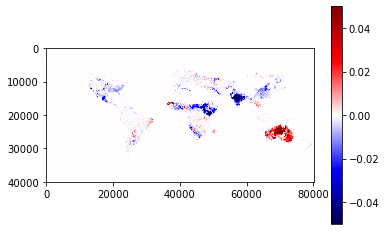

NDVI 2


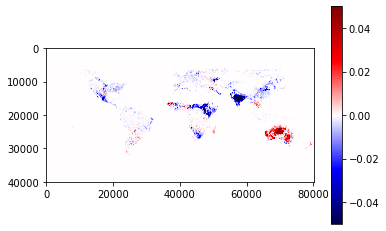

NDVI 3


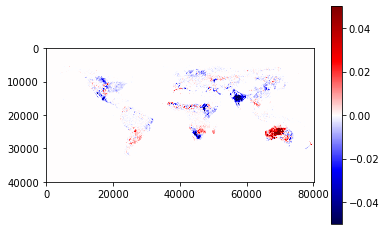

NDVI 4


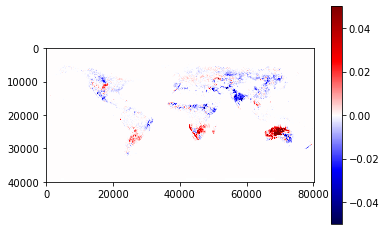

NDVI 5


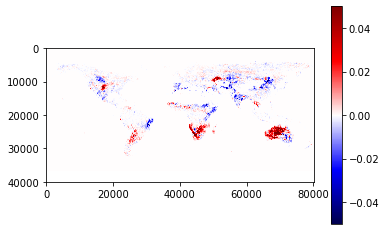

NDVI 6


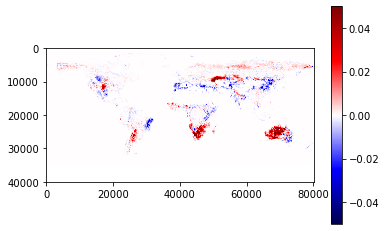

NDVI 7


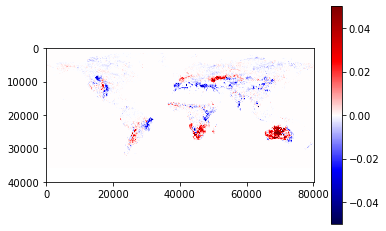

NDVI 8


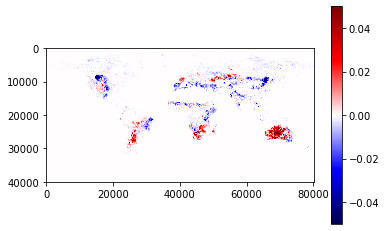

NDVI 9


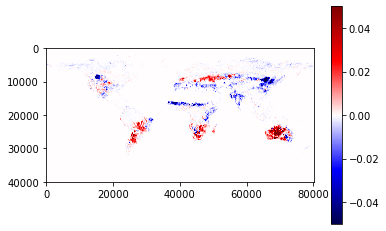

NDVI 10


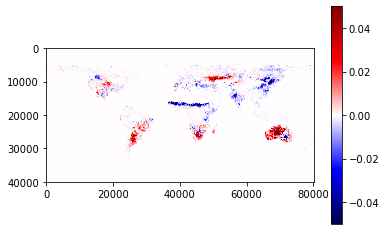

NDVI 11


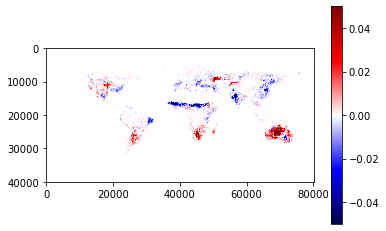

NDVI 12


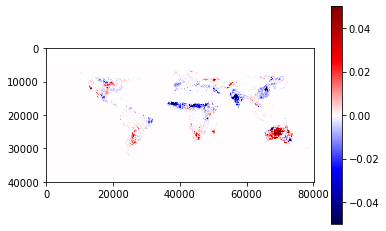

SSI 1


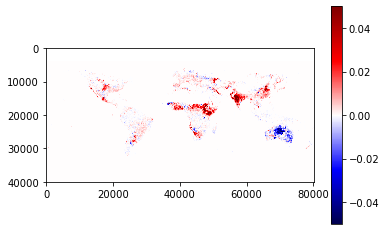

SSI 2


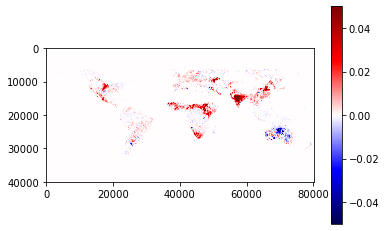

SSI 3


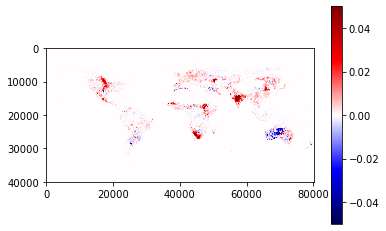

SSI 4


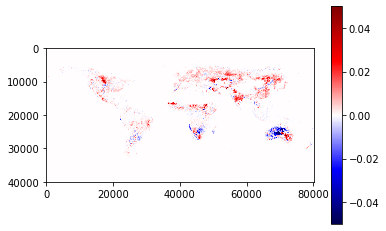

SSI 5


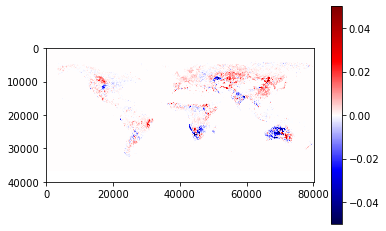

SSI 6


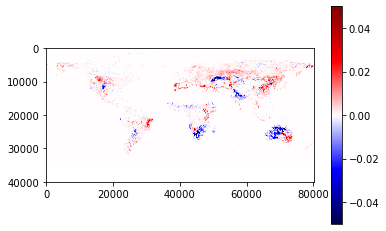

SSI 7


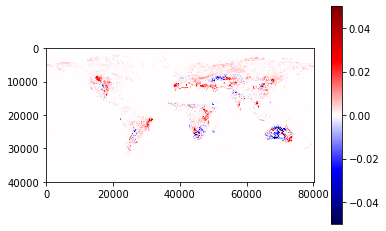

SSI 8


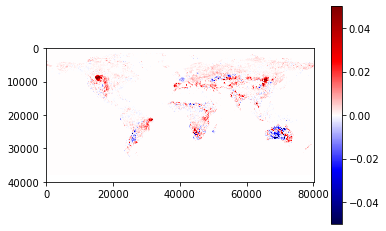

SSI 9


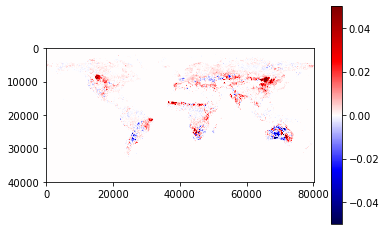

SSI 10


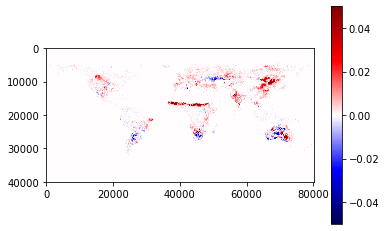

SSI 11


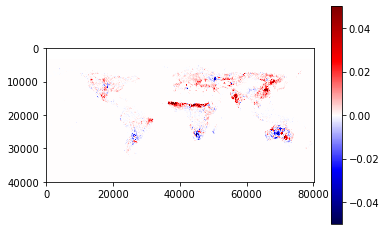

SSI 12


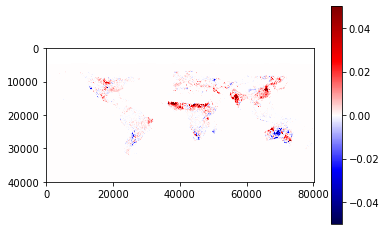

NMDI 1


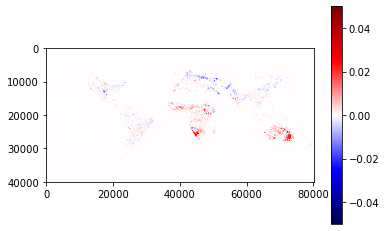

NMDI 2


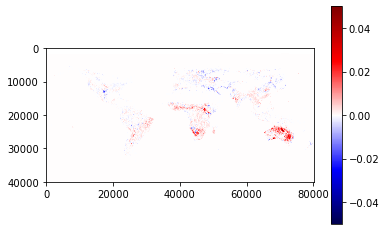

NMDI 3


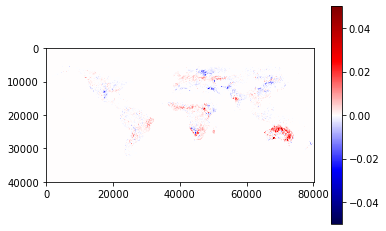

NMDI 4


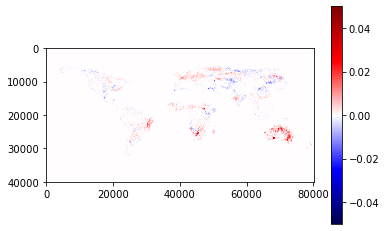

NMDI 5


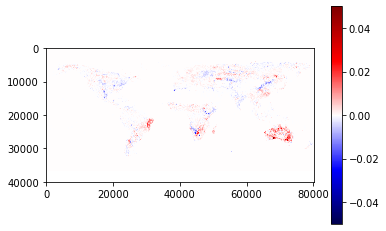

NMDI 6


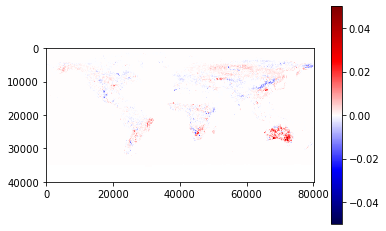

NMDI 7


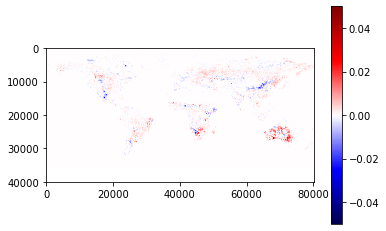

NMDI 8


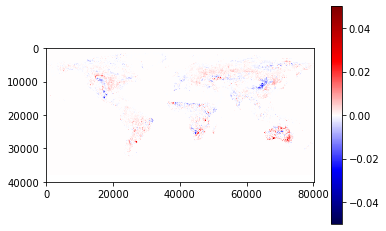

NMDI 9


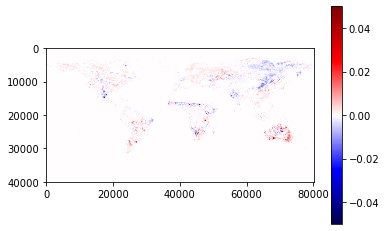

NMDI 10


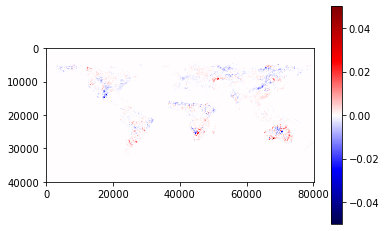

NMDI 11


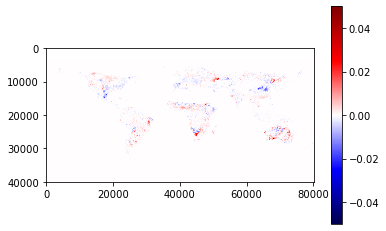

NMDI 12


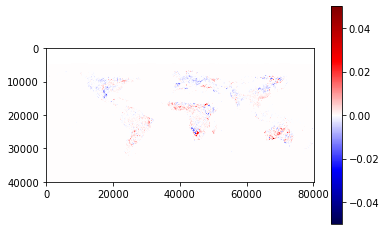

In [2]:
from tool import *
for b in ['NDVI','SSI','NMDI']:
    for m in range(1,13):
        bm(b,m)


In [6]:
from tool import *
def get_sza(y=2001):
    def judge_a(Hour, snoon, a):
        
        if(a >= 0 and a <= pi and Hour < snoon):
            a = pi - a
        elif(a >= 0 and a <= pi and Hour == snoon):
            pass
        elif(a >= 0 and a <= pi and Hour > snoon):
            a = pi + a

        return a

    def get_h0_a(lon, lat, date, time, timezone):
       
        # 第零步：将日期转化为日期序数，1,2,3......，365；将时间转化为24小时制浮点数，如18:30转为18.5
        date = datetime.datetime.strptime(date, '%Y/%m/%d')
        Dn = int(date.strftime('%j'))
        time = datetime.datetime.strptime(time, '%H:%M')
        Hour = time.hour + time.minute/60.0

        # 第一步：计算太阳倾角(太阳直射点纬度)decl和equation of time
        gamma = 2*pi*(Dn - 1 + (Hour - 12)/24)/365

        # 计算eqtime
        eqtime = 229.18*(0.000075 + 0.001868*cos(gamma) - 0.032077*sin(gamma) - 0.014615*cos(2*gamma) - 0.040849*sin(2*gamma))

        # 计算decl
        f1 = 0.006918
        f2 = 0.399912*cos(gamma)
        f3 = 0.070257*sin(gamma)
        f4 = 0.006758*cos(gamma*2)
        f5 = 0.000907*sin(gamma*2)
        f6 = 0.002697*cos(gamma*3)
        f7 = 0.001480*sin(gamma*3)
        decl = f1 - f2 + f3 - f4 + f5 - f6 + f7

        # 第二步：计算太阳时角和方位角180度时的时间
        time_offset = eqtime + 4*lon - 60*timezone
        tst = Hour*60 + time_offset
        ha = (tst/4 - 180)
        snoon = (720 - 4*lon - eqtime)/60 + timezone

        # 第三步：计算太阳高度角
        lat = radians(lat)
        ha = radians(ha)  # 注意转为弧度
        h0 = asin(sin(lat)*sin(decl) + cos(lat)*cos(decl)*cos(ha))
        sza=90-degrees(h0)
        
        if sza>85:
            sza_L=0
        elif sza>70:
            sza_L=1
        else:
            sza_L=2
        return sza,sza_L
    def get_month_daynum(y=2001):
        md_num=[]
        n=0
        m=1
        for d in range(365):
            now=datetime.datetime.strptime(f'{y}-1-1', '%Y-%m-%d')+relativedelta(days=d)

            if m==now.month:
                n+=1
            else:
                md_num.append(n)
                n=1
                m=now.month
        md_num.append(n)
        return md_num
    def get_h0_month(lon, lat, y, m, time, timezone):
        md_num=get_month_daynum(y=y)
        m_szas=[]
        for md in [i+1 for i in range(md_num[m-1])]:
            m_szas.append(get_h0_a(lon, lat, f'{y}/{m}/{md}', time, timezone)[0])
        m_sza=np.array(m_szas).mean()
        if m_sza>85:
                sza_L=0
        elif m_sza>70:
            sza_L=1
        else:
            sza_L=2
        return m_sza,sza_L
    
    n=0
    sza_ar=np.zeros((12,40076))
    for l in tqdm([90.00220831593487-(i+0.5)*0.004491576420597608 for i in range(40076)]):
        # st=str(abs(int(l+0.5))).zfill(2)+'     '
        for m in range(1,13):
            sza_info=get_h0_month(0, l, y, m, '12:00', 0.0)
            # sza_info=get_h0_a(0, l, f'{y}/{m}/15', '12:00', 0.0)
            sza_ar[m-1,n]=sza_info[0]
        n+=1

    sza_L=np.zeros((12,40076))
    sza_L[sza_ar>70]=1
    sza_L[sza_ar>85]=2 
    return sza_ar,sza_L

In [7]:
sza,sza_l=get_sza(y=2001)
torch.save([sza,sza_l],'/data/hk/albedo/SZA.pth')

100%|██████████| 40076/40076 [21:34<00:00, 30.96it/s]


100%|██████████| 12/12 [19:24<00:00, 97.08s/it] 


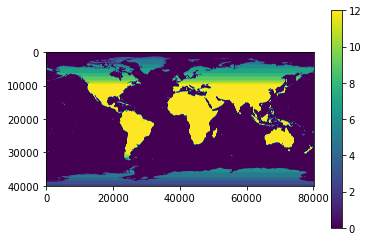

100%|██████████| 12/12 [19:42<00:00, 98.51s/it] 


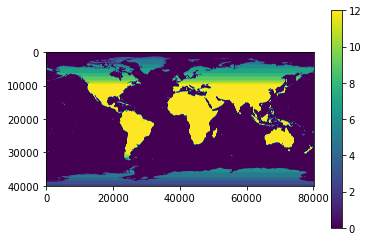

100%|██████████| 12/12 [20:16<00:00, 101.36s/it]


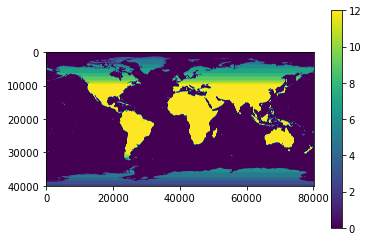

In [2]:
from tool import *
sza,sza_l=torch.load('/data/hk/albedo/SZA.pth')
lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)


for b in ['NDVI','SSI','NMDI']:
    count=np.zeros((40076, 80152))
    all=np.zeros((40076, 80152))
    for m in tqdm(range(1,13)):
        img=rasterio.open(f'/ssd_hzy/G3/{b}{m}.tif').read(1)
        SZA_L=np.ones((40076, 80152))
        SZA_L=SZA_L*(sza_l[m-1].reshape(-1,1))

        img[lc01==15]=0
        img[lc20==15]=0
        img[lc01!=lc20]=0
        img[lc01==20]=np.nan
        img[lc20==20]=np.nan
        img[SZA_L>0]=np.nan
        
        del SZA_L
        gc.collect()
        c='2001'+str(m).zfill(2)
        sc_01=rasterio.open(root_path+f'snow/snow_monthly/{c}.tif').read(1)
        c='2020'+str(m).zfill(2)
        sc_20=rasterio.open(root_path+f'snow/snow_monthly/{c}.tif').read(1)
        sc=(100-np.maximum(sc_01,sc_20))/100

        img*=sc
        del sc_01,sc_20,sc
        gc.collect()
        # raise()
        count[~np.isnan(img)]+=1
        img[np.isnan(img)]=0
        all+=img
        # plt.imshow(sc)
        # plt.colorbar()
        # plt.show()
        # raise()
        del img 
        gc.collect()
    all/=count
    # all/=100
    tif_save_snowfre(all,f'/ssd_hzy/G3/{b}.tif',global_trf,p='4326')
    plt.imshow(count)
    plt.colorbar()
    plt.show()

In [1]:
from tool import *
pi = 3.1415926
R = 6371007.181			
pixel_with=0.004491576420597608
k=[]
for i in range(40076):
    k.append((pi/180.0)*R*R*abs(math.sin((90.00220831593487-pixel_with*i)/180.0*pi) - math.sin((90.00220831593487-pixel_with*(i+1))/180.0*pi)) * pixel_with)
    
lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)
lc01[lc01==20]=0
lc01[lc20==20]=0
lc01[lc01!=0]=1
landarea=np.array(k).reshape(-1,1)*lc01
for b in ['NDVI','SSI','NMDI']:
    img=rasterio.open(f'/ssd_hzy/G3/{b}.tif').read(1)
    img2=landarea*img
    img2[np.isnan(img2)]=0
    print(b,img2.sum()/landarea.sum())


NDVI 0.00014053113962786458
SSI 0.0011412847402311873
NMDI 0.0002961895723622418


In [1]:
from tool import *
lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)
k=np.zeros(lc01.shape)
k[lc01==lc20]=lc01[lc01==lc20]
k[k==20]=0
k[lc01==16]=0
k[lc01==17]=0
k[lc01==15]=0
del lc01,lc20
gc.collect()
# k=k[20000:30000,60000:75000]

for b in ['NDVI','SSI','NMDI']:
    print(b)
    img=rasterio.open(f'/ssd_hzy/G3/{b}.tif').read(1)
    img[np.isnan(img)]=0
    print(img.mean())
    for t in tqdm(range(1,15)):
        img2=img.copy()
        img2[k!=t]=0
        # raise
        img2 = fill.fillnodata(img2, (img2!=0),max_search_distance=30)
        img[k==t]=img2[k==t]
    print(img.mean())
    tif_save_snowfre(img,f'/ssd_hzy/G3/{b}_2.tif',global_trf,p='4326')

NDVI


  0%|          | 0/14 [00:00<?, ?it/s]

2.3675639e-05


100%|██████████| 14/14 [45:47<00:00, 196.23s/it]


2.4635194e-05
SSI


  0%|          | 0/14 [00:00<?, ?it/s]

0.0002753172


100%|██████████| 14/14 [45:48<00:00, 196.34s/it]


0.0002754289
NMDI


  0%|          | 0/14 [00:00<?, ?it/s]

6.248717e-05


100%|██████████| 14/14 [45:34<00:00, 195.30s/it]


6.245891e-05


In [1]:
from tool import *
pi = 3.1415926
R = 6371007.181			
pixel_with=0.004491576420597608
k=[]
for i in range(40076):
    k.append((pi/180.0)*R*R*abs(math.sin((90.00220831593487-pixel_with*i)/180.0*pi) - math.sin((90.00220831593487-pixel_with*(i+1))/180.0*pi)) * pixel_with)
    
lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)
z=np.zeros(lc01.shape)
z[lc01==lc20]=1
z[lc01==20]=0
z[lc01==15]=0
z[lc01==16]=0
z[lc01==17]=0
lc01[lc01==20]=0
lc01[lc20==20]=0
lc01[lc01!=0]=1
landarea=np.array(k).reshape(-1,1)*lc01
del lc01,lc20,k
gc.collect()
print(landarea.sum())
for b in ['NDVI','SSI','NMDI']:
    img=rasterio.open(f'/ssd_hzy/G3/{b}_2.tif').read(1)
    img[np.isnan(img)]=0
    img=img*z
    img2=landarea*img
    print(b,img2.sum()/landarea.sum())
    del img2
    gc.collect()
    plt.imshow(img,vmin=-0.05,vmax=0.05,cmap='seismic')
    plt.colorbar()
    plt.show()
    del img
    gc.collect()

147899077368280.47
NDVI 0.00015979991400561847
SSI 0.0011255948906346122
NMDI 0.0002989021644505583


In [1]:
from tool import *
pi = 3.1415926
R = 6371007.181			
pixel_with=0.004491576420597608
k=[]
for i in range(40076):
    k.append((pi/180.0)*R*R*abs(math.sin((90.00220831593487-pixel_with*i)/180.0*pi) - math.sin((90.00220831593487-pixel_with*(i+1))/180.0*pi)) * pixel_with)
    
lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)
z=np.zeros(lc01.shape)
z[lc01==lc20]=1
z[lc01==20]=0
z[lc01==15]=0
z[lc01==16]=0
z[lc01==17]=0
lc01[lc01==20]=0
lc01[lc20==20]=0
lc01[lc01!=0]=1
landarea=np.array(k).reshape(-1,1)*lc01
del lc01,lc20,k
gc.collect()
print(landarea.sum())
for b in ['NDVI','SSI','NMDI']:
    img=rasterio.open(f'/ssd_hzy/G3/{b}_2.tif').read(1)
    img[np.isnan(img)]=0
    img2=landarea*img*z
    del z,img
    gc.collect()
    print(b,img2[:int(img2.shape[0]/2)].sum()/landarea.sum())
    print(b,img2[int(img2.shape[0]/2):].sum()/landarea.sum())

147899077368280.47
SSI 0.0011468579706620152
SSI -2.126308002737798e-05


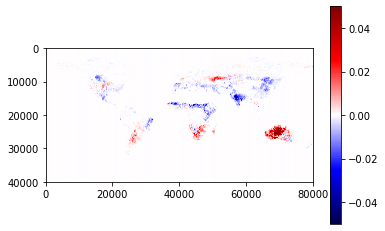

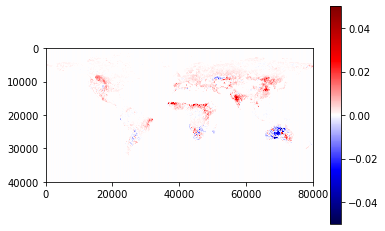

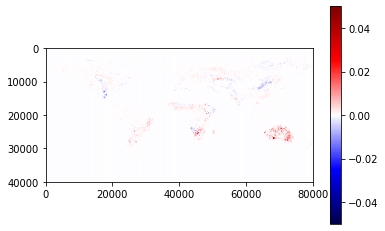

In [1]:
from tool import *
lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)
z=np.zeros(lc01.shape)
z[lc01==lc20]=1
z[lc01==20]=0
z[lc01==15]=0
z[lc01==16]=0
z[lc01==17]=0
for b in ['NDVI','SSI','NMDI']:
    img=rasterio.open(f'/ssd_hzy/G3/{b}_2.tif').read(1)
    img[np.isnan(img)]=0
    img=img*z
    c
    plt.imshow(img,vmin=-0.05,vmax=0.05,cmap='seismic')
    plt.colorbar()
    plt.show()
    del img
    gc.collect()

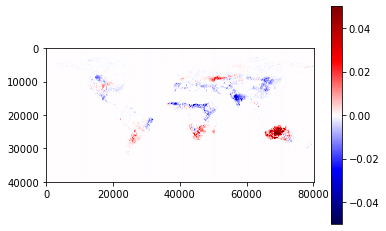

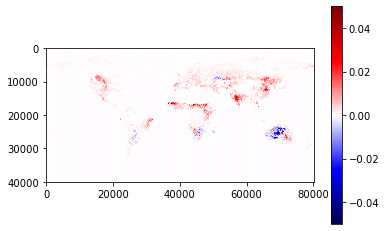

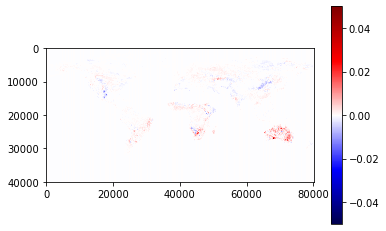

In [1]:
from tool import *
lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)
z=np.zeros(lc01.shape)
z[lc01==lc20]=1
z[lc01==20]=0
z[lc01==15]=0
z[lc01==16]=0
z[lc01==17]=0
for b in ['NDVI','SSI','NMDI']:
    img=rasterio.open(f'/ssd_hzy/G3/{b}_2.tif').read(1)
    img[np.isnan(img)]=0
    img=img*z
    tif_save_snowfre(img,f'/ssd_hzy/G3/{b}_albedo2_map.tif',global_trf,p='4326')
    plt.imshow(img,vmin=-0.05,vmax=0.05,cmap='seismic')
    plt.colorbar()
    plt.show()
    del img
    gc.collect()

### NDVI 0.00015979991400561847
### NDVI(north) -0.0007742305658712067
### NDVI(south) 0.0009340304798768229
### SSI 0.0011255948906346122
### SSI(north) 0.0011468579706620152
### SSI(south) -2.126308002737798e-05
### NMDI 0.0002989021644505583
### ALL 0.0015842969
### truth 0.002460569
### 64.387%

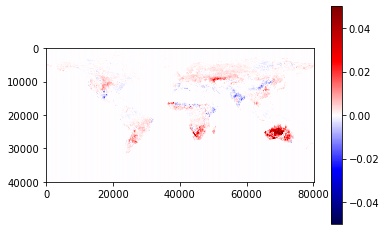

In [1]:
from tool import *
a=np.zeros((40076, 80152))
lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)
for b in ['NDVI','SSI','NMDI']:
    img=rasterio.open(f'/ssd_hzy/G3/{b}_2.tif').read(1)
    img[lc01!=lc20]=0
    img[lc01==20]=0
    img[lc01==16]=0
    img[lc01==17]=0 
    img[lc01==15]=0  
    a+=img
    del img
    gc.collect()
plt.imshow(a,vmin=-0.05,vmax=0.05,cmap='seismic')
plt.colorbar()
plt.show()

In [1]:
from tool import *
lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)
# plt.imshow(lc01==1)
# plt.show()

In [2]:
lc01[lc20!=2]=0

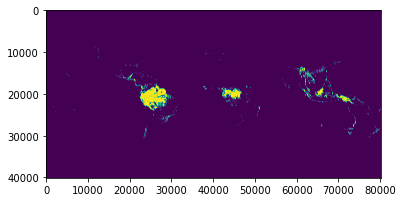

In [6]:
plt.imshow(lc01==2)
plt.show()

NDVI
-4407.854


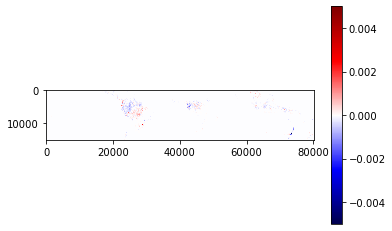

SSI
1495.8397


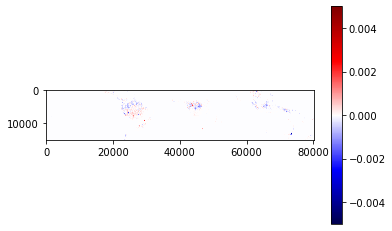

NMDI
9304.272


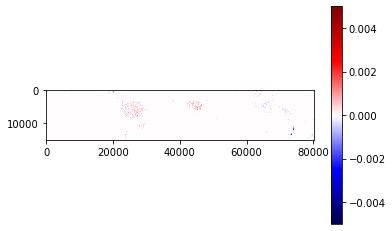

In [5]:
for b in ['NDVI','SSI','NMDI']:
    print(b)
    img=rasterio.open(f'/ssd_hzy/G3/{b}_2.tif').read(1)
    img[lc01!=2]=0
    print(img.sum())
    plt.imshow(img[15000:30000],vmin=-0.005,vmax=0.005,cmap='seismic')
    plt.colorbar()
    plt.show()

In [1]:
from tool import *
pi = 3.1415926
R = 6371007.181			
pixel_with=0.004491576420597608
k=[]
for i in range(40076):
    k.append((pi/180.0)*R*R*abs(math.sin((90.00220831593487-pixel_with*i)/180.0*pi) - math.sin((90.00220831593487-pixel_with*(i+1))/180.0*pi)) * pixel_with)
    
lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)
z=np.zeros(lc01.shape)
z[lc01==lc20]=lc01[lc01==lc20]
z[lc01==20]=0
z[lc01==15]=0
z[lc01==16]=0
z[lc01==17]=0
lc01[lc01==20]=0
lc01[lc20==20]=0
lc01[lc01!=0]=1
landarea=np.array(k).reshape(-1,1)*lc01
del lc01,lc20,k
gc.collect()
print(landarea.sum())
for b in ['NDVI','SSI','NMDI']:
    print(b)
    img=rasterio.open(f'/ssd_hzy/G3/{b}_2.tif').read(1)
    img[np.isnan(img)]=0
    img[z==0]=0
    img=landarea*img
    for i in range(1,15):
        img2=img.copy()
        img2[z!=i]=0
        print(type_code[i-1],img2.sum()/landarea.sum())
        del img2
        gc.collect()
    del img
    gc.collect()


147899077368280.47
NDVI
EN_Forests               -1.4239805295011054e-06
EB_Forests               -6.913272644281635e-06
DN_Forests               -7.340915703543377e-07
DB_Forests               -8.87882189654019e-06
M_Forests                -4.834883366901848e-06
C_Shrublands             1.1630535739981754e-05
O_Shrublands             0.0006283734337280899
W_Savannas               -2.2577104670725782e-05
Savannas                 -2.733575958030632e-06
Grasslands               -0.0001662275831622719
Permanent_Wetlands       -1.0044048224619e-06
Croplands                -0.0002548840174262024
Urban                    -3.384473855957603e-06
Cropland Natural_Mosaics -6.607845559235489e-06
SSI
EN_Forests               8.389942776888942e-06
EB_Forests               1.790581059446744e-06
DN_Forests               1.0533851654952056e-06
DB_Forests               2.1950686896935332e-05
M_Forests                3.132999482392808e-05
C_Shrublands             8.980580418210747e-07
O_Shrublands      

In [ ]:
EN_Forests               2+
EB_Forests               3+
DN_Forests               2-
DB_Forests               2+
M_Forests                2+
C_Shrublands             1+
O_Shrublands             1+
W_Savannas               2+
Savannas                 2+
Grasslands               2+
Permanent_Wetlands       2+
Croplands                2+
Urban                    2+
Cropland Natural_Mosaics 2+

In [1]:
from tool import *
a=np.zeros((40076, 80152))
lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)
for b in ['NDVI','SSI','NMDI']:
    img=rasterio.open(f'/ssd_hzy/G3/{b}_2.tif').read(1)
    img[lc01!=lc20]=0
    img[lc01==20]=0
    img[lc01==16]=0
    img[lc01==17]=0 
    img[lc01==15]=0  
    a+=img
    del img
    gc.collect()

tif_save_snowfre(a,f'/ssd_hzy/G3/all_2.tif',global_trf,p='4326')

In [1]:
from tool import *
sza,sza_l=torch.load('/data/hk/albedo/SZA.pth')
lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)


for b in ['NDVI','SSI','NMDI']:
    count=np.zeros((40076, 80152))
    all=np.zeros((40076, 80152))
    for m in tqdm(range(1,13)):
        img=rasterio.open(f'/ssd_hzy/G3/{b}{m}.tif').read(1)
        SZA_L=np.ones((40076, 80152))
        SZA_L=SZA_L*(sza_l[m-1].reshape(-1,1))

        img[lc01==15]=0
        img[lc20==15]=0
        img[lc01!=lc20]=0
        img[lc01==20]=np.nan
        img[lc20==20]=np.nan
        img[SZA_L>1]=np.nan
        
        del SZA_L
        gc.collect()
        c='2001'+str(m).zfill(2)
        sc_01=rasterio.open(root_path+f'snow/snow_monthly/{c}.tif').read(1)
        c='2020'+str(m).zfill(2)
        sc_20=rasterio.open(root_path+f'snow/snow_monthly/{c}.tif').read(1)
        sc=(100-np.maximum(sc_01,sc_20))/100

        img*=sc
        del sc_01,sc_20,sc
        gc.collect()
        # raise()
        count[~np.isnan(img)]+=1
        img[np.isnan(img)]=1000
        tif_save_snowfre(img,f'/ssd_hzy/G3/{b}{m}_85.tif',global_trf,p='4326')
        img[img==1000]=0
        all+=img
        # plt.imshow(sc)
        # plt.colorbar()
        # plt.show()
        # raise()
        
        
        del img 
        gc.collect()
        
    all/=count
    # all/=100
    tif_save_snowfre(all,f'/ssd_hzy/G3/{b}_85.tif',global_trf,p='4326')
    # plt.imshow(count)
    # plt.colorbar()
    # plt.show()

100%|██████████| 12/12 [33:10<00:00, 165.85s/it]


100%|██████████| 12/12 [13:08<00:00, 65.72s/it]


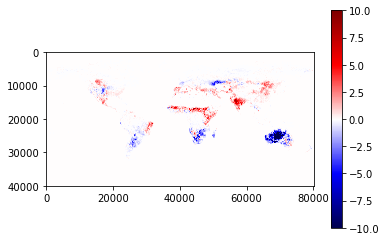

100%|██████████| 12/12 [13:37<00:00, 68.12s/it]


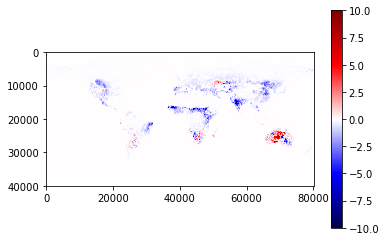

100%|██████████| 12/12 [13:53<00:00, 69.43s/it]


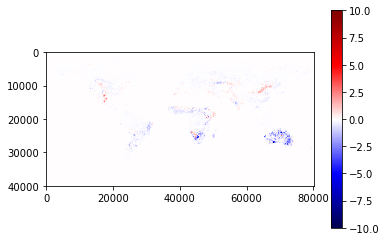

In [1]:
from tool import *
for b in ['NDVI','SSI','NMDI']:
    img_y=np.zeros((40076, 80152)).astype(np.float32)
    all=rasterio.open(f'/ssd_hzy/G3/{b}_85.tif').read(1)
    for m in tqdm(range(1,13)):
        now=datetime.datetime.strptime(f'2001-{m}-1', '%Y-%m-%d')
        month_time=(now+relativedelta(months=1)-now).total_seconds()
        img=rasterio.open(f'/ssd_hzy/G3/{b}{m}_85.tif').read(1)
        img[img==1000]=all[img==1000]
        # raise()
        sw=torch.load(f"/data/hk/albedo/SW_MERRA2/{m}_SW_1degree.tif")
        sw=resample_wb_fraction(sw,width=80152,height=40076,resample_alg = gdalconst.GRIORA_NearestNeighbour)
        img[img==0]=np.nan
        eg=(-img)*sw*month_time
        eg[np.isnan(eg)]=0
        img_y+=eg
        # raise()
    y_len=365*24*3600
    img_y/=y_len
    tif_save_snowfre(img_y,f'/ssd_hzy/G3/{b}_eg.tif',global_trf,p='4326')
    plt.imshow(img_y,vmax=10,vmin=-10,cmap='seismic')
    plt.colorbar()
    plt.show()

In [1]:
from tool import *
pi = 3.1415926
R = 6371007.181			
pixel_with=0.004491576420597608
k=[]
for i in range(40076):
    k.append((pi/180.0)*R*R*abs(math.sin((90.00220831593487-pixel_with*i)/180.0*pi) - math.sin((90.00220831593487-pixel_with*(i+1))/180.0*pi)) * pixel_with)
    
lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)
z=np.zeros(lc01.shape)
z[lc01==lc20]=1
z[lc01==20]=0
z[lc01==15]=0
z[lc01==16]=0
z[lc01==17]=0
lc01[lc01==20]=0
lc01[lc20==20]=0
lc01[lc01!=0]=1
landarea=np.array(k).reshape(-1,1)*lc01
del lc01,lc20,k

gc.collect()
print(landarea.sum())
for b in ['NDVI','SSI','NMDI']:
    img=rasterio.open(f'/ssd_hzy/G3/{b}_eg.tif').read(1)
    img[np.isnan(img)]=0
    img2=landarea*z*img
    del img
    gc.collect()
    print(b,img2[:int(img2.shape[0]/2)].sum()/5.1e8/1e6)
    del img2
    gc.collect()

# del landarea
# gc.collect()
# for b in ['NDVI','SSI','NMDI']:
#     img=rasterio.open(f'/ssd_hzy/G3/{b}_eg.tif').read(1)
#     img[np.isnan(img)]=0
#     img=img*z
#     plt.imshow(img,vmin=-0.05,vmax=0.05,cmap='seismic')
#     plt.colorbar()
#     plt.show()
#     del img
#     gc.collect()

147899077368280.47
NDVI 0.05269383198540613
SSI -0.06874480050409743
NMDI -0.002211534309982792


### NDVI -0.015360800151733703
### NDVI(south) -0.06805463213713894
### NDVI(north) 0.05269383198540613
### SSI -0.06795199173580957
### SSI(north)  0.000792808768287856
### SSI(north) -0.06874480050409743
### NMDI -0.020241249592026018
### ALL -0.10355404147956929
### truth -0.1584
### 65.38%

In [1]:
from tool import *
lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)
k=np.zeros(lc01.shape)
k[lc01==lc20]=lc01[lc01==lc20]
k[k==20]=0
k[lc01==16]=0
k[lc01==17]=0
k[lc01==15]=0
del lc01,lc20
gc.collect()
# k=k[20000:30000,60000:75000]

for b in ['NDVI','SSI','NMDI']:
    print(b)
    img=rasterio.open(f'/ssd_hzy/G3/{b}_eg.tif').read(1)
    img[np.isnan(img)]=0
    print(img.mean())
    for t in tqdm(range(1,15)):
        img2=img.copy()
        img2[k!=t]=0
        # raise
        img2 = fill.fillnodata(img2, (img2!=0),max_search_distance=30)
        img[k==t]=img2[k==t]
    print(img.mean())
    tif_save_snowfre(img,f'/ssd_hzy/G3/{b}_eg2.tif',global_trf,p='4326')

NDVI


  0%|          | 0/14 [00:00<?, ?it/s]

-0.009626421


100%|██████████| 14/14 [45:10<00:00, 193.61s/it]


-0.009836251
SSI


  0%|          | 0/14 [00:00<?, ?it/s]

-0.054317005


100%|██████████| 14/14 [45:01<00:00, 192.97s/it]


-0.05432963
NMDI


  0%|          | 0/14 [00:00<?, ?it/s]

-0.014386007


100%|██████████| 14/14 [45:01<00:00, 192.98s/it]


-0.014386034


147899077368280.47


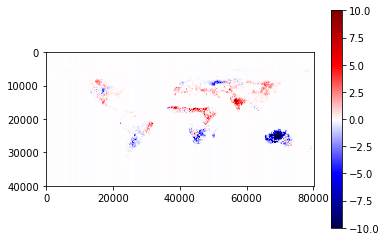

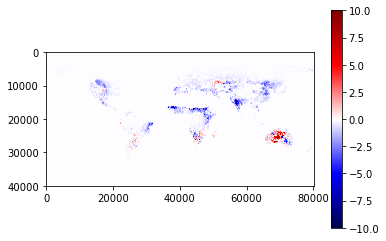

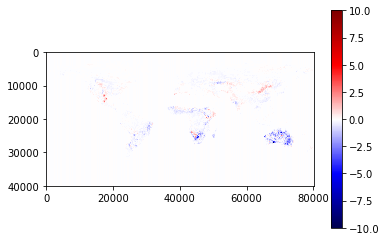

In [1]:
from tool import *
gc.collect()
pi = 3.1415926
R = 6371007.181			
pixel_with=0.004491576420597608
k=[]
for i in range(40076):
    k.append((pi/180.0)*R*R*abs(math.sin((90.00220831593487-pixel_with*i)/180.0*pi) - math.sin((90.00220831593487-pixel_with*(i+1))/180.0*pi)) * pixel_with)
    
lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)
z=np.zeros(lc01.shape)
z[lc01==lc20]=1
z[lc01==20]=0
z[lc01==15]=0
z[lc01==16]=0
z[lc01==17]=0
lc01[lc01==20]=0
lc01[lc20==20]=0
lc01[lc01!=0]=1
landarea=np.array(k).reshape(-1,1)*lc01
del lc01,lc20,k

gc.collect()
print(landarea.sum())
# for b in ['NDVI','SSI','NMDI']:
#     img=rasterio.open(f'/ssd_hzy/G3/{b}_eg2.tif').read(1)
#     img[np.isnan(img)]=0
#     img2=landarea*z*img
#     del img
#     gc.collect()
#     print(b,img2.sum()/5.1e8/1e6)
#     del img2
#     gc.collect()

del landarea
gc.collect()
for b in ['NDVI','SSI','NMDI']:
    img=rasterio.open(f'/ssd_hzy/G3/{b}_eg2.tif').read(1)
    img[np.isnan(img)]=0
    img=img*z
    tif_save_snowfre(img,f'/ssd_hzy/G3/{b}_eg2_map.tif',global_trf,p='4326')
    plt.imshow(img,vmin=-10,vmax=10,cmap='seismic')
    plt.colorbar()
    plt.show()
    del img
    gc.collect()

In [3]:
(-0.015697557064724126-0.067933874798423-0.020262894284574468)/0.1584

-0.6558985236598585

In [ ]:
### NDVI -0.015697557064724126
### SSI -0.067933874798423
### NMDI -0.020262894284574468
### ALL -0.1038943261477216
### truth -0.1584
### 65.58%

In [1]:
from tool import *
new_trf=(global_trf[0]+global_trf[1],global_trf[1]*2,0,global_trf[3]+global_trf[5],0,global_trf[5]*2)
new_trf

(-179.99992505544913,
 0.008983152841195215,
 0,
 89.99771673951427,
 0,
 -0.008983152841195215)

In [1]:
from tool import *
bb=['NDVI','SSI','NMDI']

for b in bb:
    print(b)
    img=rasterio.open(f'/ssd_hzy/G3/{b}_albedo2_map.tif').read(1)
    img[img==0]=np.nan
    img=img.reshape((int(40076/2),2,-1))
    img=img.reshape((int(40076/2),2,int(80152/2),2))
    img=img.transpose((0,2,1,3))
    img=img.reshape((20038, 40076, 4))
    img=np.nanmean(img,axis=2)
    img[np.isnan(img)]=0
    new_trf=(global_trf[0]+global_trf[1],global_trf[1]*2,0,global_trf[3]+global_trf[5],0,global_trf[5]*2)
    tif_save_snowfre(img,f'/data2/hzy/{b}_albedo2_map_1000m.tif',new_trf,p='4326')

NDVI
SSI
NMDI


In [2]:
from tool import *
bb=['NDVI','SSI','NMDI']
for b in bb:
    print(b)
    img=rasterio.open(f'/ssd_hzy/G3/{b}_eg2_map.tif').read(1)
    img[img==0]=np.nan
    img=img.reshape((int(40076/2),2,-1))
    img=img.reshape((int(40076/2),2,int(80152/2),2))
    img=img.transpose((0,2,1,3))
    img=img.reshape((20038, 40076, 4))
    img=np.nanmean(img,axis=2)
    img[np.isnan(img)]=0
    new_trf=(global_trf[0]+global_trf[1],global_trf[1]*2,0,global_trf[3]+global_trf[5],0,global_trf[5]*2)
    tif_save_snowfre(img,f'/data2/hzy/{b}_eg2_map_1000m.tif',new_trf,p='4326')
    # tif_save_snowfre(img,f'/ssd_hzy/G3/{b}_eg2_map_1000m.tif',global_trf,p='4326')

NDVI


SSI
NMDI


In [ ]:
"/data/hk/albedo/albedo_rebuilding/rebuilding2_RF_2020-2001.tif"
"/ssd_hzy/albedo_rebuilding/rebuilding2_albedo_2020-2001.tif"

In [2]:
from tool import *
img=rasterio.open("/data2/hzy/ssd_hzy/figure_map/snowfraction_20012020mean.tif").read(1)
# img=rasterio.open().read(1)
img[img==0]=np.nan
img=img.reshape((int(40076/2),2,-1))
img=img.reshape((int(40076/2),2,int(80152/2),2))
img=img.transpose((0,2,1,3))
img=img.reshape((20038, 40076, 4))
img=np.nanmean(img,axis=2)
img[np.isnan(img)]=0
new_trf=(global_trf[0]+global_trf[1],global_trf[1]*2,0,global_trf[3]+global_trf[5],0,global_trf[5]*2)
tif_save_snowfre(img,"/data2/hzy/ssd_hzy/figure_map/snowfraction_20012020mean_1000m.tif",new_trf,p='4326')

In [6]:
img=rasterio.open("/data/hk/albedo/albedo_rebuilding/rebuilding2_albedo_2020-2001.tif").read(1)
img[img==0]=np.nan
img=img.reshape((int(40076/2),2,-1))
img=img.reshape((int(40076/2),2,int(80152/2),2))
img=img.transpose((0,2,1,3))
img=img.reshape((20038, 40076, 4))
img=np.nanmean(img,axis=2)
img[np.isnan(img)]=0
new_trf=(global_trf[0]+global_trf[1],global_trf[1]*2,0,global_trf[3]+global_trf[5],0,global_trf[5]*2)
tif_save_snowfre(img,f'/data2/hzy/rebuilding2_albedo_2020-2001_1000m.tif',new_trf,p='4326')

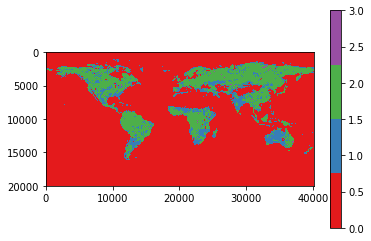

In [18]:
from tool import *
bb=['NDVI','SSI','NMDI']
imgs=[rasterio.open(f'/data2/hzy/ssd_hzy/figure_map/{b}_albedo2_map_1000m.tif').read(1) for b in bb]
imgs=np.stack(imgs,axis=0)
imgs=np.abs(imgs)
imgs_id=np.argmax(imgs,axis=0)
for i in range(3):
    imgs_id[imgs[i]==0]=4
imgs_id+=1
imgs_id[imgs_id==5]=0
# tif_save_snowfre(imgs_id,f'/data2/hzy/albedo2_map_maxid.tif',global_trf,p='4326')
from tool import *
# imgs_id=rasterio.open(f'/ssd_hzy/G3/albedo2_map_maxid.tif').read(1)
import matplotlib
from_list = matplotlib.colors.LinearSegmentedColormap.from_list
plt.figure(figsize=(30,30))
cm = from_list('Set15', plt.cm.Set1(range(0,4)), 4)
plt.cm.register_cmap(None, cm)
plt.set_cmap(cm)
plt.imshow(imgs_id)
plt.colorbar()
plt.show()

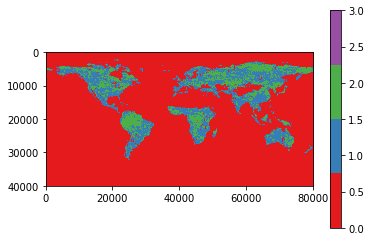

In [1]:
from tool import *
bb=['NDVI','SSI','NMDI']
imgs=[rasterio.open(f'/ssd_hzy/G3/{b}_albedo2_map.tif').read(1) for b in bb]
imgs=np.stack(imgs,axis=0)
imgs=np.abs(imgs)
imgs_id=np.argmax(imgs,axis=0)
for i in range(3):
    imgs_id[imgs[i]==0]=4
imgs_id+=1
imgs_id[imgs_id==5]=0
# tif_save_snowfre(imgs_id,'/data2/hzy/ssd_hzy/figure_map/albedo_map_maxid_1000m.tif',global_trf,p='4326')
from tool import *
# imgs_id=rasterio.open(f'/ssd_hzy/G3/albedo2_map_maxid.tif').read(1)
import matplotlib
from_list = matplotlib.colors.LinearSegmentedColormap.from_list
cm = from_list('Set15', plt.cm.Set1(range(0,4)), 4)
plt.cm.register_cmap(None, cm)
plt.set_cmap(cm)

plt.imshow(imgs_id)
plt.colorbar()
plt.show()

In [ ]:
imgs_id=rasterio.open('/data2/hzy/ssd_hzy/figure_map/albedo_map_maxid.tif').read(1)
plt.figure(figsize=(30,30))
cm = from_list('Set15', plt.cm.Set1(range(0,4)), 4)
plt.cm.register_cmap(None, cm)
plt.set_cmap(cm)
plt.imshow(imgs_id)
plt.colorbar()
plt.show()

: 

In [1]:
from tool import *
m=1
c='2001'+str(m).zfill(2)
sc_01=rasterio.open(root_path+f'snow/snow_monthly/{c}.tif').read(1)

In [2]:
sc_01

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [100, 100, 100, ..., 100, 100, 100],
       [100, 100, 100, ..., 100, 100, 100],
       [100, 100, 100, ..., 100, 100, 100]], dtype=int16)

2001 1
2001 2
2001 3
2001 4
2001 5
2001 6
2001 7
2001 8
2001 9
2001 10
2001 11
2001 12
2020 1
2020 2
2020 3
2020 4
2020 5
2020 6
2020 7
2020 8
2020 9
2020 10
2020 11
2020 12


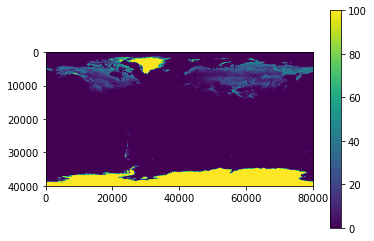

In [1]:
from tool import *
import torch

_,sza_l=torch.load('/data/hk/albedo/SZA.pth')

y_img=np.zeros((40076, 80152))
count=np.zeros((40076, 80152))
for year in [2001,2020]:
    for m in range(1,13):
        print(year,m)
        c=str(year)+str(m).zfill(2)
        sc_01=rasterio.open(root_path+f'snow/snow_monthly/{c}.tif').read(1)
        # raise()
        SZA_L=np.ones((40076, 80152))
        SZA_L=SZA_L*(sza_l[m-1].reshape(-1,1))
        sc_01[SZA_L>=1]=0
        y_img+=sc_01
        del sc_01
        gc.collect()
        count[SZA_L<1]+=1
        del SZA_L
        gc.collect()
y_img/=count
tif_save_snowfre(y_img,f'/data2/hzy/snowfraction_20012020mean.tif',global_trf,p='4326')
plt.imshow(y_img)
plt.colorbar()
plt.show()
    

In [ ]:
from tool import *
sza,sza_l=torch.load('/data/hk/albedo/SZA.pth')
lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)


for b in ['NDVI','SSI','NMDI']:
    # count=np.zeros((40076, 80152))
    max=np.zeros((40076, 80152))
    min=np.zeros((40076, 80152))
    for m in tqdm(range(1,13)):

  0%|          | 0/12 [00:00<?, ?it/s]

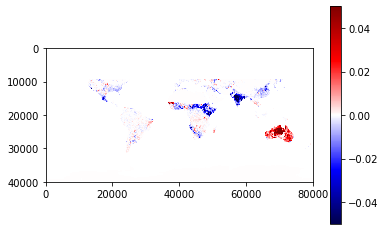

  0%|          | 0/12 [02:37<?, ?it/s]


TypeError: exceptions must derive from BaseException

In [1]:
from tool import *
sza,sza_l=torch.load('/data/hk/albedo/SZA.pth')
lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)
z=np.zeros(lc01.shape)
z[lc01==lc20]=1
z[lc01==20]=0
z[lc01==15]=0
z[lc01==16]=0
z[lc01==17]=0

for b in ['NDVI','SSI','NMDI']:
    print(b)
    # count=np.zeros((40076, 80152))
    # all=np.zeros((40076, 80152))
    # img_y=rasterio.open(f'/ssd_hzy/G3/{b}_albedo2_map.tif').read(1)
    for m in tqdm(range(1,13)):
        img=rasterio.open(f'/ssd_hzy/G3/{b}{m}.tif').read(1)
        SZA_L=np.ones((40076, 80152))
        SZA_L=SZA_L*(sza_l[m-1].reshape(-1,1))

        img[lc01==15]=0
        img[lc20==15]=0
        img[lc01!=lc20]=0
        img[lc01==20]=np.nan
        img[lc20==20]=np.nan
        img[SZA_L>0]=np.nan
        
        del SZA_L
        gc.collect()
        c='2001'+str(m).zfill(2)
        sc_01=rasterio.open(root_path+f'snow/snow_monthly/{c}.tif').read(1)
        c='2020'+str(m).zfill(2)
        sc_20=rasterio.open(root_path+f'snow/snow_monthly/{c}.tif').read(1)
        sc=(100-np.maximum(sc_01,sc_20))/100

        img*=sc
        del sc_01,sc_20,sc
        gc.collect()
        # raise()
        img=img*z

        tif_save_snowfre(img,f'/data2/hzy/ssd_hzy/G3/{b}{m}_albedo2_multisnow.tif',global_trf,p='4326')
        # img[np.isnan(img)]=0
        # all+=img
        # plt.imshow(img,vmin=-0.05,vmax=0.05,cmap='seismic')
        # plt.colorbar()
        # plt.show()
        # raise()
        del img 
        gc.collect()
    # all/=count
    # # all/=100
    # tif_save_snowfre(all,f'/ssd_hzy/G3/{b}.tif',global_trf,p='4326')
    # plt.imshow(count)
    # plt.colorbar()
    # plt.show()

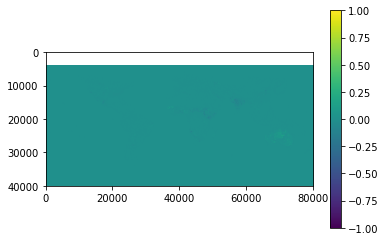

In [1]:
from tool import *
img=rasterio.open(f'/ssd_hzy/G3/NDVI1.tif').read(1)
plt.imshow(img)
plt.colorbar()
plt.show()

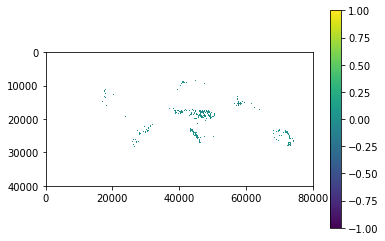

In [2]:
from tool import *
img[img==0]=np.nan
plt.imshow(img)
plt.colorbar()
plt.show()

In [ ]:
from tool import *
lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)
z=np.zeros(lc01.shape)
z[lc01==lc20]=1
z[lc01==20]=0
z[lc01==15]=0
z[lc01==16]=0
z[lc01==17]=0
# for b in ['NDVI','SSI','NMDI']:
#     img=rasterio.open(f'/ssd_hzy/G3/{b}_2.tif').read(1)
#     img[np.isnan(img)]=0
#     img=img*z
#     tif_save_snowfre(img,f'/ssd_hzy/G3/{b}_albedo2_map.tif',global_trf,p='4326')
#     plt.imshow(img,vmin=-0.05,vmax=0.05,cmap='seismic')
#     plt.colorbar()
#     plt.show()
#     del img
#     gc.collect()

In [1]:
from tool import *
sza,sza_l=torch.load('/data/hk/albedo/SZA.pth')
lc01=rasterio.open("/data/hk/albedo/landcover/2001_landcover/2001_landcover.tif").read(1)
lc20=rasterio.open("/data/hk/albedo/landcover/2020_landcover/2020_landcover.tif").read(1)


for b in ['NDVI','SSI','NMDI']:
    count=np.zeros((40076, 80152))
    all=np.zeros((40076, 80152))
    for m in tqdm(range(1,13)):
        img=rasterio.open(f'/ssd_hzy/G3/{b}{m}.tif').read(1)
        SZA_L=np.ones((40076, 80152))
        SZA_L=SZA_L*(sza_l[m-1].reshape(-1,1))

        img[lc01==15]=0
        img[lc20==15]=0
        img[lc01!=lc20]=0
        img[lc01==20]=np.nan
        img[lc20==20]=np.nan
        img[SZA_L>0]=np.nan
        
        del SZA_L
        gc.collect()
        c='2001'+str(m).zfill(2)
        sc_01=rasterio.open(root_path+f'snow/snow_monthly/{c}.tif').read(1)
        c='2020'+str(m).zfill(2)
        sc_20=rasterio.open(root_path+f'snow/snow_monthly/{c}.tif').read(1)
        sc=(100-np.maximum(sc_01,sc_20))/100

        img*=sc
        del sc_01,sc_20,sc
        gc.collect()
        # raise()
        img[img==0]=np.nan
        tif_save_snowfre(img,f'/data2/hzy/ssd_hzy/G3/{b}{m}_albedo2_multisnow.tif',global_trf,p='4326')
        count[~np.isnan(img)]+=1
        img[np.isnan(img)]=0
        all+=img
        # plt.imshow(sc)
        # plt.colorbar()
        # plt.show()
        # raise()
        del img 
        gc.collect()
    all/=count
    # all/=100
    tif_save_snowfre(all,f'/data2/hzy/ssd_hzy/G3/{b}_v2.tif',global_trf,p='4326')
    plt.imshow(count)
    plt.colorbar()
    plt.show()

  0%|          | 0/12 [00:00<?, ?it/s]